In [2]:
#import
import pandas as pd
import matplotlib.pyplot as plt

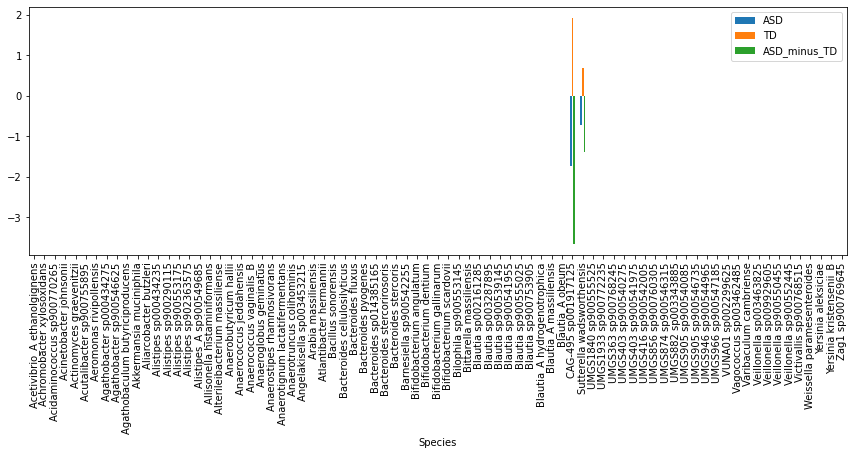

In [27]:
#Wang2020ASD
probs = pd.read_csv('../../Wang2020ASD/shap2/class_probabilities.tsv', sep = '\t', index_col = False)
#probs = pd.read_csv('../../Wang2020ASD/shap3/shap/data/class_probabilities.tsv', sep = '\t', index_col = False)
#remove columns with all 0 values
probs_new = probs.loc[:, (probs != 0).any(axis=0)]
Metadata = pd.read_csv('../../Wang2020ASD/sample_metadata_wang.txt', sep = '\t')
#select ids and status
Metadata_new = Metadata[['sampleid', 'Group']]
#Merge two df based on sampleid
Wang_probs = Metadata_new.merge(probs_new, left_on="sampleid", right_on = 'Unnamed: 0')
Wang_probs = Wang_probs.drop(['sampleid', 'Unnamed: 0'], axis=1)
Wang_probs_mean = Wang_probs.groupby('Group',as_index=False).mean()
Wang_probs_mean_transposed = Wang_probs_mean.T
#add colnames for dataframe
Wang_probs_mean_transposed = Wang_probs_mean_transposed.reset_index()
Wang_probs_mean_transposed.columns = ['Species','ASD', 'TD']
#remove first row
Wang_probs_mean_transposed = Wang_probs_mean_transposed.iloc[1: , :]
# #add one column
Wang_probs_mean_transposed['ASD_minus_TD'] = Wang_probs_mean_transposed['ASD']- Wang_probs_mean_transposed['TD']
#plot
#Wang_probs_mean_transposed.sort_values(by=['ASD_minus_TD'],ascending=True).head(20).plot(x='Species', y=["ASD","TD","ASD_minus_TD"], kind="bar",align='center')
Wang_probs_mean_transposed.plot(x='Species', y=["ASD","TD","ASD_minus_TD"], kind="bar",align='center')
plt.tight_layout(rect=[0, 0, 2, 1])
plt.subplots_adjust(bottom=0.1)
#plt.ylim(-5E-18, 5E-18)

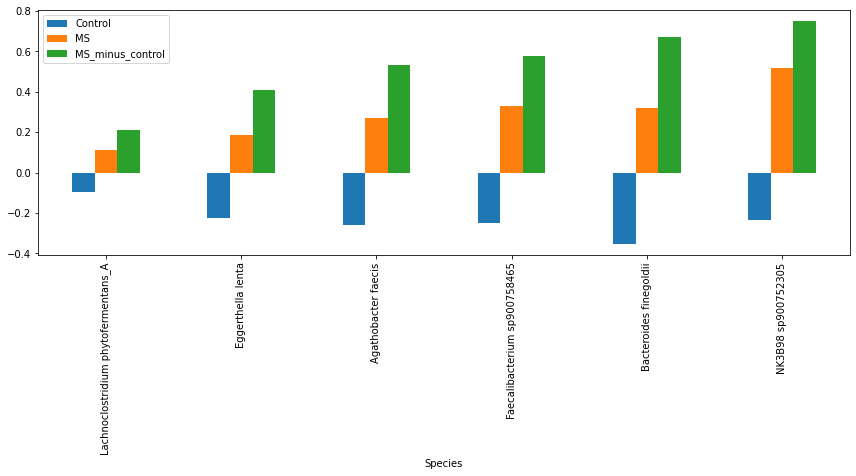

In [29]:
#iMSMS2021MS
probs = pd.read_csv('../../iMSMS2021MS/shap2/class_probabilities.tsv', sep = '\t', index_col = False)
#remove columns with all 0 values
probs_new = probs.loc[:, (probs != 0).any(axis=0)]
Metadata = pd.read_csv('../../iMSMS2021MS/iMSMS2021MS_metadata_matched.txt', sep = '\t')
#select ids and status
Metadata_new = Metadata[['featureid', 'disease_state']]
#Merge two df based on sampleid
iMSMS_probs = Metadata_new.merge(probs_new, left_on="featureid", right_on = 'Unnamed: 0')
iMSMS_probs = iMSMS_probs.drop(['featureid', 'Unnamed: 0'], axis=1)
iMSMS_probs_mean = iMSMS_probs.groupby('disease_state',as_index=False).mean()
iMSMS_probs_mean_transposed = iMSMS_probs_mean.T
#add colnames for dataframe
iMSMS_probs_mean_transposed = iMSMS_probs_mean_transposed.reset_index()
iMSMS_probs_mean_transposed.columns = ['Species','Control', 'MS']
#remove first row
iMSMS_probs_mean_transposed = iMSMS_probs_mean_transposed.iloc[1: , :]
#add one column
iMSMS_probs_mean_transposed['MS_minus_control'] = iMSMS_probs_mean_transposed['MS']- iMSMS_probs_mean_transposed['Control']
#plot
iMSMS_probs_mean_transposed.sort_values(by=['MS_minus_control'],ascending=True).plot(x='Species', y=["Control","MS","MS_minus_control"], kind="bar",align='center')
plt.tight_layout(rect=[0, 0, 2, 1])
plt.subplots_adjust(bottom=0.1)

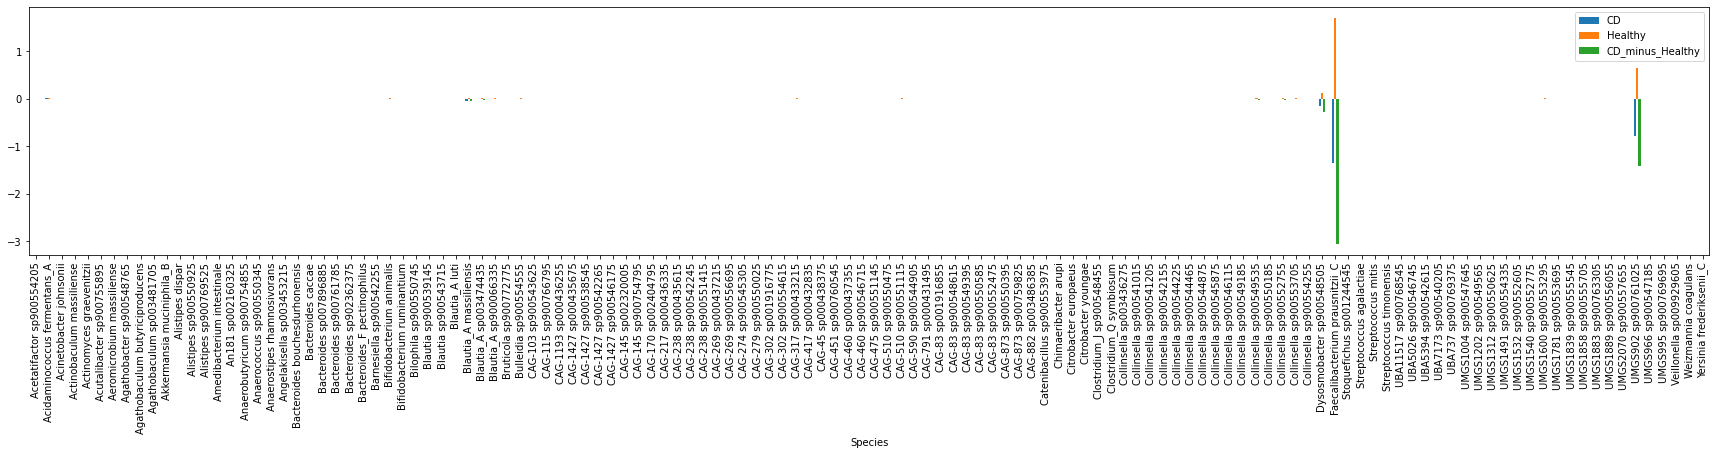

In [55]:
#Freanzosa2019IBD_CD
probs = pd.read_csv('../../Franzosa2019IBD/shap/shap/data/class_probabilities.tsv', sep = '\t', index_col = False)
#remove columns with all 0 values
probs_new = probs.loc[:, (probs != 0).any(axis=0)]
Metadata = pd.read_csv('../../Franzosa2019IBD/Metadata_CD_matched.txt', sep = '\t')
#select ids and status
Metadata_new = Metadata[['featureid', 'Status']]
#Merge two df based on sampleid
Franzosa_CD_probs = Metadata_new.merge(probs_new, left_on="featureid", right_on = 'Unnamed: 0')
Franzosa_CD_probs = Franzosa_CD_probs.drop(['featureid', 'Unnamed: 0'], axis=1)
Franzosa_CD_probs_mean = Franzosa_CD_probs.groupby('Status',as_index=False).mean()
Franzosa_CD_probs_mean_transposed = Franzosa_CD_probs_mean.T
#add colnames for dataframe
Franzosa_CD_probs_mean_transposed = Franzosa_CD_probs_mean_transposed.reset_index()
Franzosa_CD_probs_mean_transposed.columns = ['Species','CD', 'Healthy']
#remove first row
Franzosa_CD_probs_mean_transposed = Franzosa_CD_probs_mean_transposed.iloc[1: , :]
#add one column
Franzosa_CD_probs_mean_transposed['CD_minus_Healthy'] = Franzosa_CD_probs_mean_transposed['CD']- Franzosa_CD_probs_mean_transposed['Healthy']
#plot
#Franzosa_CD_probs_mean_transposed.sort_values(by=['CD_minus_Healthy'],ascending=True).head(20).plot(x='Species', y=["CD","Healthy","CD_minus_Healthy"], kind="bar",align='center')
Franzosa_CD_probs_mean_transposed.plot(x='Species', y=["CD","Healthy","CD_minus_Healthy"], kind="bar",align='center')
plt.tight_layout(rect=[0, 0, 4, 1])
plt.subplots_adjust(bottom=0.1)
#plt.ylim(-5E-18, 5E-18)

In [59]:
Franzosa_CD_probs_mean_transposed.sort_values(by=['CD_minus_Healthy'],ascending=True).head(20)

,Species,CD,Healthy,CD_minus_Healthy
100,Faecalibacterium prausnitzii_C,-1.360865,1.695287,-3.056153
123,UMGS902 sp900761025,-0.787342,0.638786,-1.426128
99,Dysosmobacter sp900548505,-0.16737,0.107381,-0.274751
34,Blautia_A massiliensis,-0.042085,0.013214,-0.055298
94,Collinsella sp900549535,-0.017833,0.011909,-0.029742
35,Blautia_A sp003474435,-0.018281,0.006807,-0.025088
96,Collinsella sp900552755,-0.01413,0.007758,-0.021888
36,Blautia_A sp900066335,-0.014214,0.003766,-0.01798
59,CAG-317 sp000433215,-0.012631,0.005141,-0.017772
67,CAG-510 sp900551115,-0.001854,0.014289,-0.016142


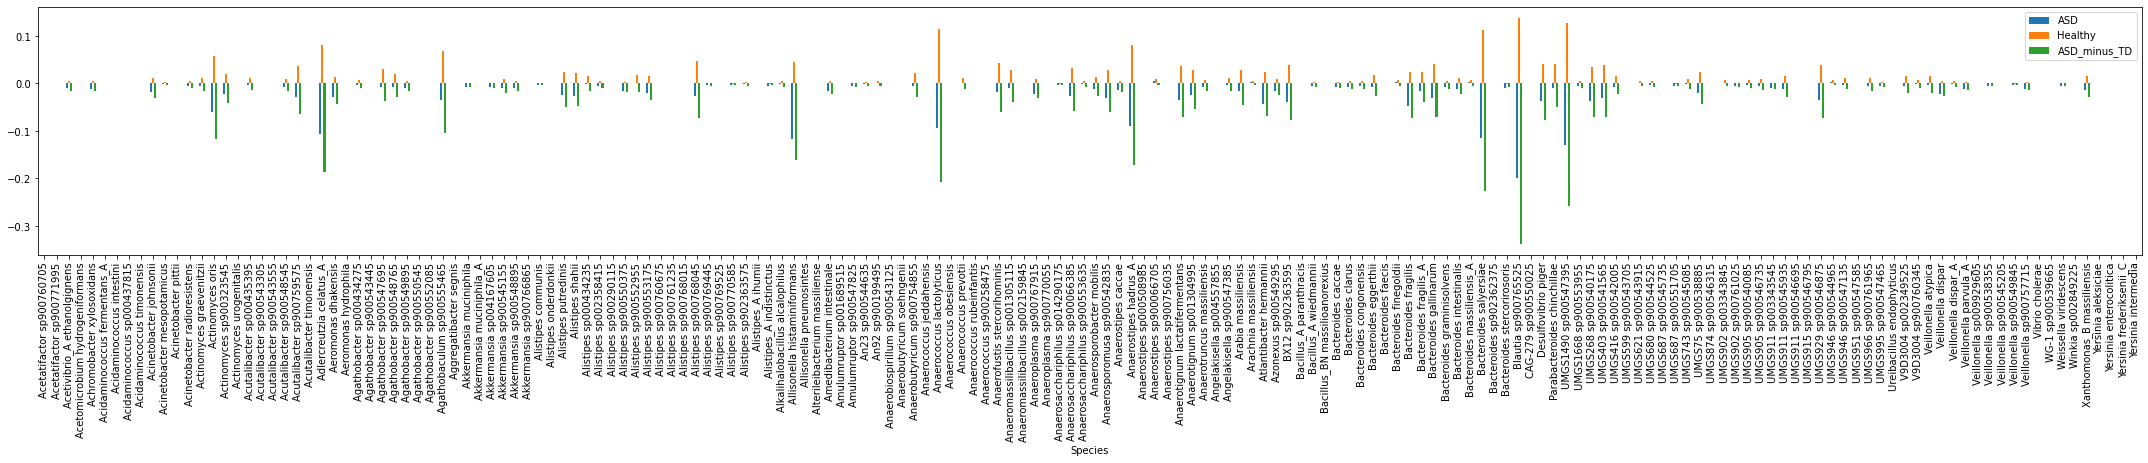

In [22]:
#Dan2020ASD
probs = pd.read_csv('../../Dan2020ASD/SHAP_GB/class_probabilities.tsv', sep = '\t', index_col = False)
#remove columns with all 0 values
probs_new = probs.loc[:, (probs != 0).any(axis=0)]
Metadata = pd.read_csv('../../Dan2020ASD/Dan2020ASD_metadata_matched.txt', sep = '\t')
#select ids and status
Metadata_new = Metadata[['featureid', 'Status']]
#Merge two df based on sampleid
Dan_probs = Metadata_new.merge(probs_new, left_on="featureid", right_on = 'Unnamed: 0')
Dan_probs = Dan_probs.drop(['featureid', 'Unnamed: 0'], axis=1)
Dan_probs_mean = Dan_probs.groupby('Status',as_index=False).mean()
Dan_probs_mean_transposed = Dan_probs_mean.T
#add colnames for dataframe
Dan_probs_mean_transposed = Dan_probs_mean_transposed.reset_index()
Dan_probs_mean_transposed.columns = ['Species','ASD', 'Healthy']
#remove first row
Dan_probs_mean_transposed = Dan_probs_mean_transposed.iloc[1: , :]
#add one column
Dan_probs_mean_transposed['ASD_minus_TD'] = Dan_probs_mean_transposed['ASD']- Dan_probs_mean_transposed['Healthy']
#plot
#Dan_probs_mean_transposed.sort_values(by=['ASD_minus_TD'],ascending=False).head(20).plot(x='Species', y=["ASD","Healthy","ASD_minus_TD"], kind="bar",align='center')
Dan_probs_mean_transposed.plot(x='Species', y=["ASD","Healthy","ASD_minus_TD"], kind="bar",align='center')
plt.tight_layout(rect=[0, 0, 5, 1])
plt.subplots_adjust(bottom=0.1)

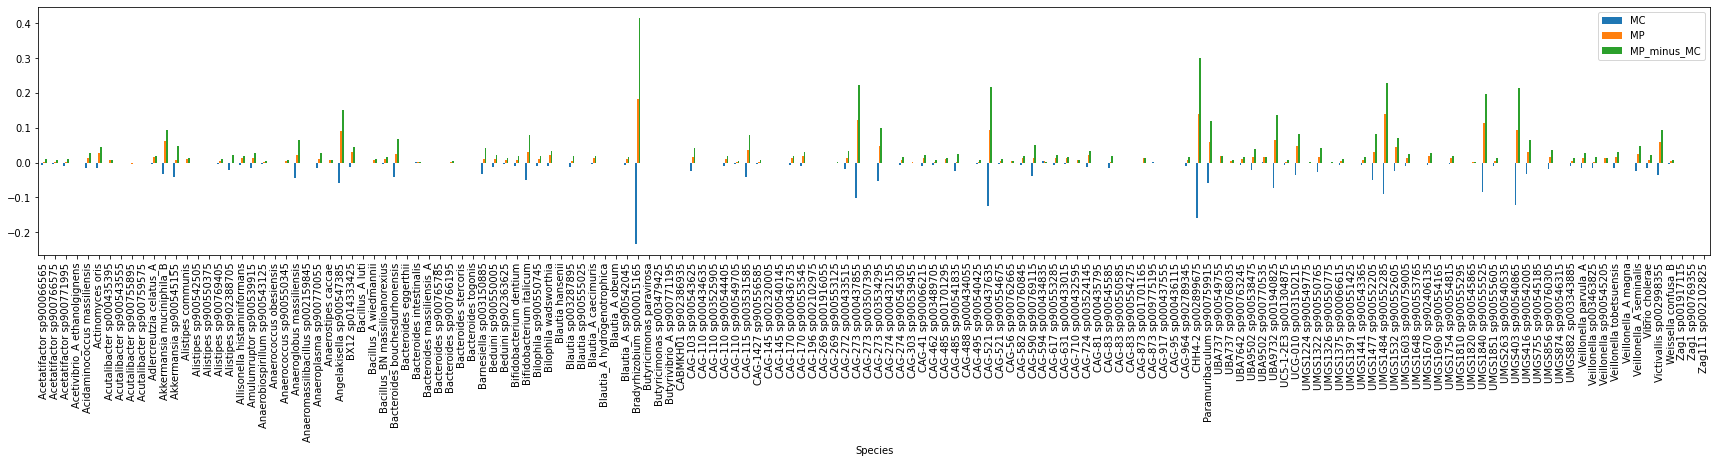

In [49]:
#Qian2020PD
probs = pd.read_csv('../../Qian2020PD/shap/shap/data/class_probabilities.tsv', sep = '\t', index_col = False)
#remove columns with all 0 values
probs_new = probs.loc[:, (probs != 0).any(axis=0)]
Metadata = pd.read_csv('../../Qian2020PD/SraRunTable_Qian2020PD.txt', sep = '\t')
#select ids and status
Metadata_new = Metadata[['Run', 'Status']]
#Merge two df based on sampleid
Qian_probs = Metadata_new.merge(probs_new, left_on="Run", right_on = 'Unnamed: 0')
Qian_probs = Qian_probs.drop(['Run', 'Unnamed: 0'], axis=1)
Qian_probs_mean = Qian_probs.groupby('Status',as_index=False).mean()
Qian_probs_mean_transposed = Qian_probs_mean.T
#add colnames for dataframe
Qian_probs_mean_transposed = Qian_probs_mean_transposed.reset_index()
Qian_probs_mean_transposed.columns = ['Species','MC', 'MP']
#remove first row
Qian_probs_mean_transposed = Qian_probs_mean_transposed.iloc[1: , :]
#add one column
Qian_probs_mean_transposed['MP_minus_MC'] = Qian_probs_mean_transposed['MP']- Qian_probs_mean_transposed['MC']
#plot
Qian_probs_mean_transposed.plot(x='Species', y=["MC","MP","MP_minus_MC"], kind="bar",align='center')
plt.tight_layout(rect=[0, 0, 4, 1])
plt.subplots_adjust(bottom=0.1)
#plt.ylim(-5E-18, 5E-18)

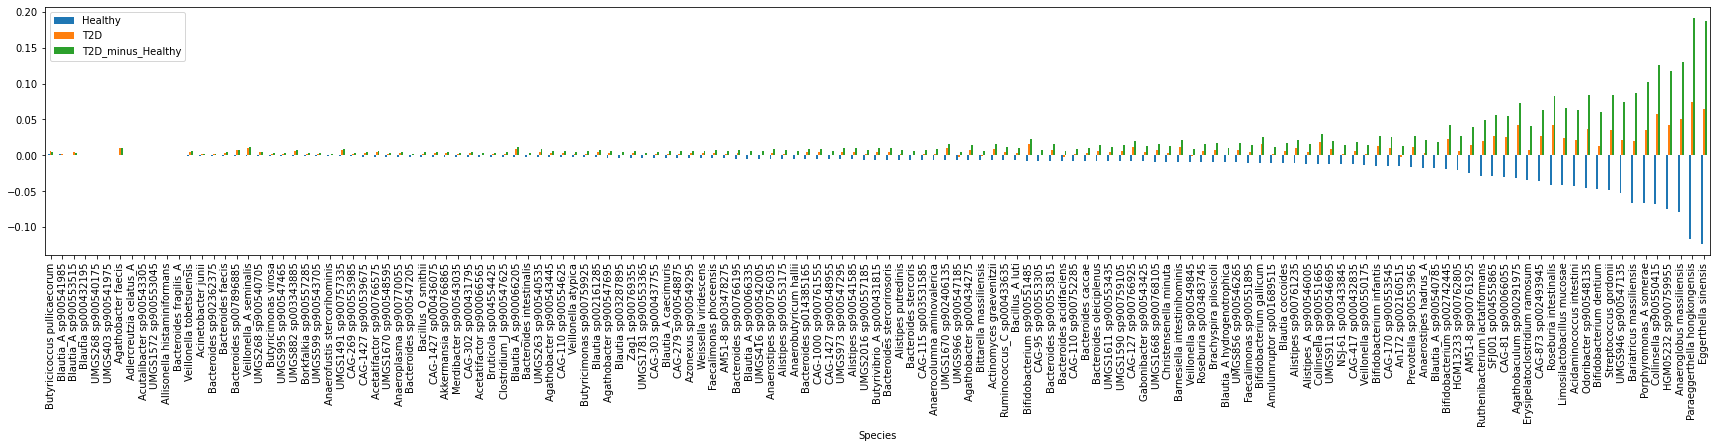

In [30]:
#Qin2012T2D
probs = pd.read_csv('../../Qin2012T2D/shap_220/data/class_probabilities.tsv', sep = '\t', index_col = False)
#remove columns with all 0 values
probs_new = probs.loc[:, (probs != 0).any(axis=0)]
Metadata = pd.read_csv('../../Qin2012T2D/Qin2012T2D_metadata_new221.txt', sep = '\t')
#select ids and status
Metadata_new = Metadata[['Run', 'Diabetic']]
#Merge two df based on sampleid
Qin_probs = Metadata_new.merge(probs_new, left_on="Run", right_on = 'Unnamed: 0')
Qin_probs = Qin_probs.drop(['Run', 'Unnamed: 0'], axis=1)
Qin_probs_mean = Qin_probs.groupby('Diabetic',as_index=False).mean()
Qin_probs_mean_transposed = Qin_probs_mean.T
#add colnames for dataframe
Qin_probs_mean_transposed = Qin_probs_mean_transposed.reset_index()
Qin_probs_mean_transposed.columns = ['Species','Healthy', 'T2D']
#remove first row
Qin_probs_mean_transposed = Qin_probs_mean_transposed.iloc[1: , :]
#add one column
Qin_probs_mean_transposed['T2D_minus_Healthy'] = Qin_probs_mean_transposed['T2D']- Qin_probs_mean_transposed['Healthy']
#plot
Qin_probs_mean_transposed.sort_values(by=['Healthy'],ascending=False).plot(x='Species', y=["Healthy","T2D","T2D_minus_Healthy"], kind="bar",align='center')
# Qin_probs_mean_transposed.sort_values(by=['T2D'],ascending=False).head(70).plot(x='Species', y=["Healthy","T2D","T2D_minus_Healthy"], kind="bar",align='center')
plt.tight_layout(rect=[0, 0, 4, 1])
plt.subplots_adjust(bottom=0.1)
#plt.ylim(-5E-18, 5E-18)

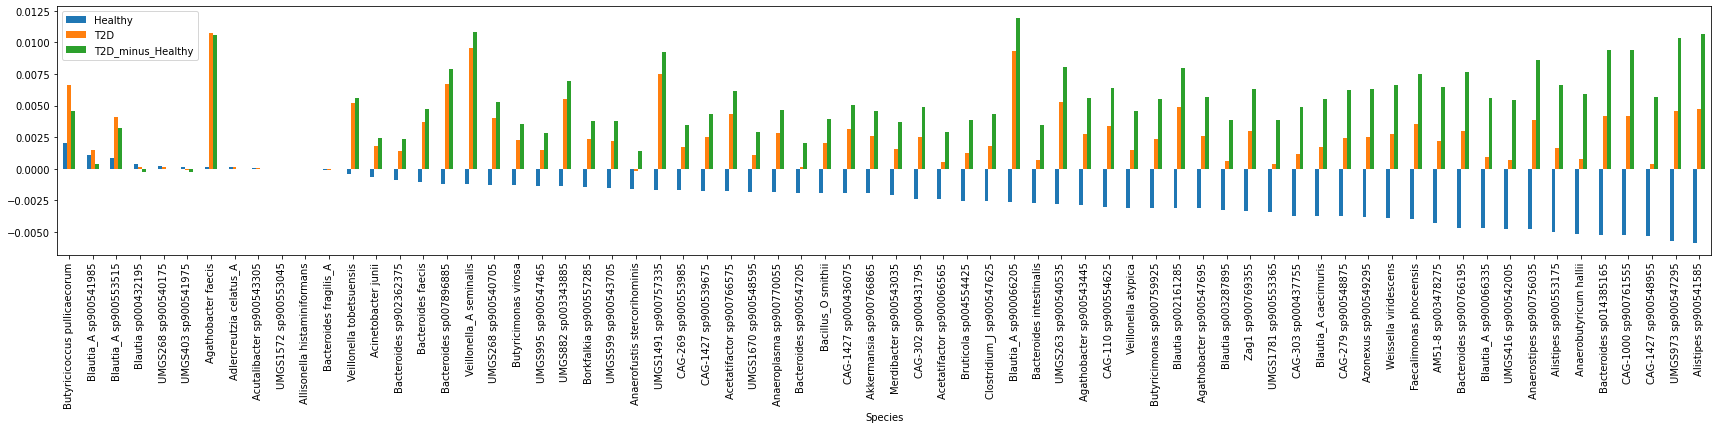

In [26]:
Qin_probs_mean_transposed.sort_values(by=['Healthy'],ascending=False).head(70).plot(x='Species', y=["Healthy","T2D","T2D_minus_Healthy"], kind="bar",align='center')
plt.tight_layout(rect=[0, 0, 4, 1])
plt.subplots_adjust(bottom=0.1)